<a href="https://colab.research.google.com/github/arfkhan11/Python-All-Work/blob/master/MNIST_V1_CH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 34.7MB/s 
     |████████████████████████████████| 3.8MB 47.1MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [22]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras.datasets import mnist
#The MNIST database (Modified National Institute of Standards and Technology database)
#It is a large database of handwritten digits that is commonly used for training various image processing systems.
#The database is also widely used for training and testing in the field of machine learning.


In [0]:
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
#images are stored in numpy arrays
#labels are arrays of digits.

In [25]:
train_images.shape #images, rows, columns

(60000, 28, 28)

In [26]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
train_images[0].ndim

2

In [28]:
train_images[0].shape

(28, 28)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
train_labels[0]

5

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers  #list of the layers comprising the model.
network=models.Sequential() #The sequential API allows you to create models layer-by-layer for most problems. 
#It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))#Dense means fully conneected layers.
#The rectified linear activation function is a piecewise linear function.
#that will output the input directly if is positive.
#otherwise, it will output zero.
#NN learn from activation parameter.
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#Compile:Configures the network for training.
#Optimizer:The mechanism through which the network will update itself based on the data it se and its loss function.
#Loss:Network will be able to measure its performance on the training data, will be able to steer in right direction.
#Metrics:To monitor(judge the performance of your model) during training and testing(accuracy)

In [0]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255


In [0]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

#Converts intergers to binary matrix.
#converts this into a matrix as many columns as there are classes
#https://keras.io/utils/

In [36]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#trains the network for a fixed number of epochs(iterations on dataset).

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2560 - accuracy: 0.9251
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1042 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0684 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0376 - accuracy: 0.9886


In [37]:
test_loss, test_acc=network.evaluate(test_images, test_labels) ##input data, target data.
print('test_acc', test_acc)

10000/10000 [==============================] - 1s 81us/sample - loss: 0.0690 - accuracy: 0.9773
test_acc 0.9773


In [38]:
network.predict(test_images)

array([[2.38115092e-08, 5.23911914e-10, 4.08107098e-06, ...,
        9.99965668e-01, 1.66017657e-07, 8.10849997e-07],
       [9.46428699e-11, 5.83473934e-07, 9.99999166e-01, ...,
        1.25552941e-15, 2.21393307e-07, 1.27996949e-16],
       [5.75544803e-08, 9.99655128e-01, 1.21878875e-05, ...,
        7.24736674e-05, 2.30973455e-04, 1.95951614e-07],
       ...,
       [9.05247123e-13, 3.55029073e-09, 1.57446001e-11, ...,
        1.14746422e-06, 8.65504887e-07, 3.62408997e-07],
       [1.46301148e-11, 2.77185826e-11, 1.57441985e-13, ...,
        2.01522965e-11, 5.83331666e-06, 1.32844538e-12],
       [8.46973741e-11, 2.28217845e-15, 3.04294263e-12, ...,
        7.31331000e-16, 6.19401318e-12, 3.74293483e-15]], dtype=float32)

In [40]:
network.predict(test_images)[0]

array([2.3811509e-08, 5.2391191e-10, 4.0810710e-06, 2.9153824e-05,
       6.2644177e-13, 7.6948837e-08, 4.4866092e-14, 9.9996567e-01,
       1.6601766e-07, 8.1085000e-07], dtype=float32)

In [41]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


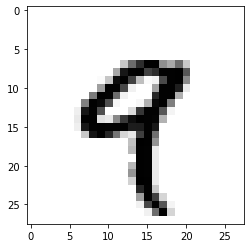

In [45]:
digit=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [46]:
train_labels[4]

9